<a href="https://colab.research.google.com/github/lmrhody/femethodsS23/blob/main/week5_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Notebook
## Exploratory Analysis with Text Data
Student Name: Michael Smith

Date: 03/13/2023

Assignment Due:

Instructor: Lisa Rhody

Methods of Text Analysis, Spring 2023

## Note: 
This week we are switching from the NLTK Book to using a companion Google Colab notebook for the O'Reilly series of books titled _Blueprints for Text Analytics Using Python_. This week, the reading is focused on the kinds of questions we can ask with text data, and so it's fitting for you to start learning what the preliminary process is for exploring a text corpus in order to begin thinking about waht questions could be asked of it. 

However, this notebook is not exactly the same as the one from the Blueprints book, because interspersed in between exercises are questions to answer. So, my recommendation is that you go through the PDF of the chapter in the Commons library while you work through this notebook. At the same time, you'll want to respond to the additional questions with the help of the readings from this week. 


[**Blueprints for Text Analysis Using Python**](https://github.com/blueprints-for-text-analytics-python/blueprints-text)  
Jens Albrecht, Sidharth Ramachandran, Christian Winkler

**If you like the book or the code examples here, please leave a friendly comment on [Amazon.com](https://www.amazon.com/Blueprints-Text-Analytics-Using-Python/dp/149207408X)!**
<img src="https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/rating.png?raw=1" width="100"/>


# Chapter 1:<div class='tocSkip'/>

# Gaining Early Insights from Textual Data

## Remark<div class='tocSkip'/>

The code in this notebook differs slightly from the printed book. For example we frequently use pretty print (`pp.pprint`) instead of `print` and `tqdm`'s `progress_apply` instead of Pandas' `apply`. 

Moreover, several layout and formatting commands, like `figsize` to control figure size or subplot commands are removed in the book.

You may also find some lines marked with three hashes ###. Those are not in the book as well as they don't contribute to the concept.

All of this is done to simplify the code in the book and put the focus on the important parts instead of formatting.

## Setup<div class='tocSkip'/>

Set directory locations. If working on Google Colab: copy files and install required libraries.

In [13]:
import sys, os
ON_COLAB = False
%run -i blueprints-text-master/ch01/setup.py

You are working on a local system.
Files will be searched relative to "..".


## Load Python Settings<div class="tocSkip"/>

Common imports, defaults for formatting in Matplotlib, Pandas etc.

In [14]:
%run "blueprints-text-master/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

## What you will learn and what we will build


# Exploratory Data Analysis


# Introducing the Dataset


In [15]:
pd.options.display.max_colwidth = 150 ###
file = "un-general-debates-blueprint.csv"
file = f"blueprints-text-master/data/un-general-debates/un-general-debates-blueprint.csv.gz" ### real location
df = pd.read_csv(file)
df.sample(2, random_state=53)

,session,year,country,country_name,speaker,position,text
3871,51,1996,PER,Peru,Francisco Tudela Van Breughel Douglas,Minister for Foreign Affairs,"﻿At the outset, allow me,\nSir, to convey to you and to this Assembly the greetings\nand congratulations of the Peruvian people, as well as\ntheir..."
4697,56,2001,GBR,United Kingdom,Jack Straw,Minister for Foreign Affairs,"﻿Please allow me\nwarmly to congratulate you, Sir, on your assumption of\nthe presidency of the fifty-sixth session of the General\nAssembly.\nThi..."


# Blueprint: Getting an Overview of the Data with Pandas


## Calculating Summary Statistics for Columns


In [16]:
df['length'] = df['text'].str.len()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.00,49.61,12.89,25.00,39.00,51.00,61.00,70.00
year,7507.00,1994.61,12.89,1970.00,1984.00,1996.00,2006.00,2015.00
length,7507.00,17967.28,7860.04,2362.00,12077.00,16424.00,22479.50,72041.00


In [17]:
df[['country', 'speaker']].describe(include='O').T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


## Checking for Missing Data


In [18]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

In [19]:
df['speaker'].fillna('unkown', inplace=True)

In [20]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

## Plotting Value Distributions


<AxesSubplot:>

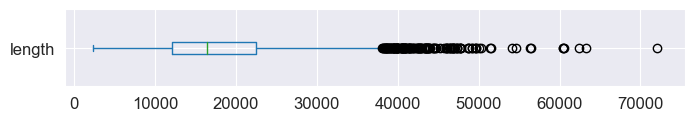

In [21]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

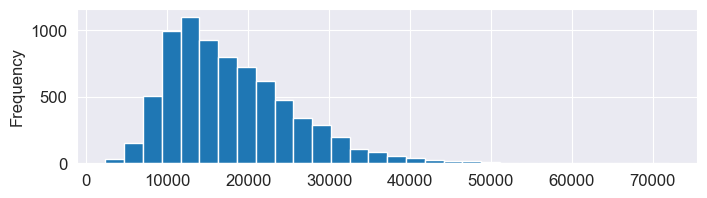

In [22]:
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

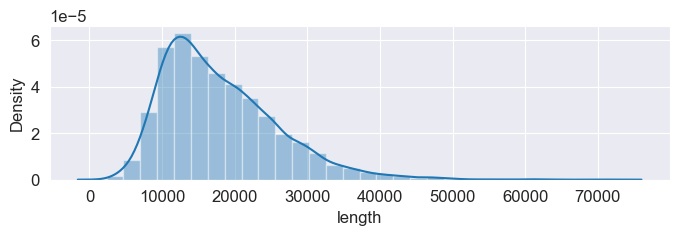

In [23]:
# Not in book: seaborn plot with gaussian kernel density estimate
import seaborn as sns

plt.figure(figsize=(8, 2))
sns.distplot(df['length'], bins=30, kde=True);

## Question 1: 

In this section, you are learning how to get a general insight into the dataset by looking at its length, finding missing data types, and evaluating things that are duplicate values because there are multiple references or multiple forms of textual representation. What is the benefit to computational text analysis of blueprint or (as Salganick calls them, "readymades")? 

Readymades can come in different forms, such as administrative records, social media data, and even public datasets. These data sources are created for a purpose other than research, but can still be useful for researchers who are interested in studying social phenomena. These data sources allow researches to not have to always start from scratch when starting an analysis project. But there can be limitations with the data having biases built-in, based on collection methods or reduction techniques that may or may not be made visible to the researchers.

## Comparing Value Distributions across Categories


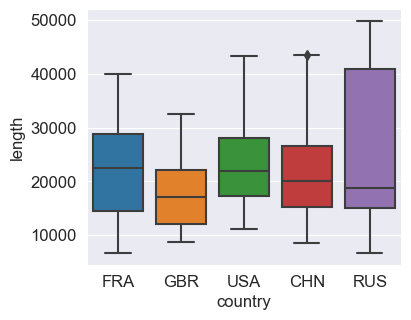

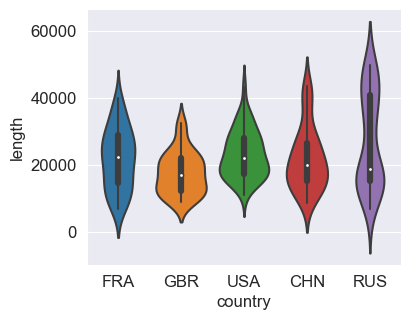

In [24]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
g = sns.catplot(data=df[where], x="country", y="length", kind='box')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###
g = sns.catplot(data=df[where], x="country", y="length", kind='violin')
g.fig.set_size_inches(4, 3) ###
g.fig.set_dpi(100) ###

## Visualizing Developments over Time


<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

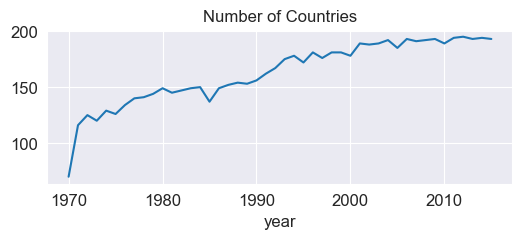

In [25]:
df.groupby('year').size().plot(title="Number of Countries", figsize=(6,2))

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

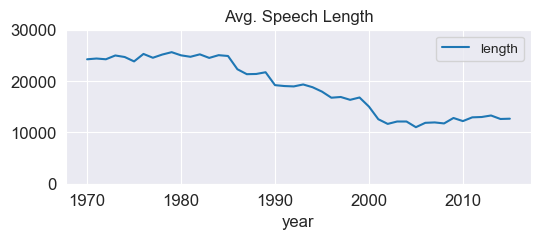

In [26]:
df.groupby('year').agg({'length': 'mean'}) \
  .plot(title="Avg. Speech Length", ylim=(0,30000), figsize=(6,2))

## Question 2: 

What kinds of questions can you ask when you can visualize distributions or change? What kind of data do you need in order for these visualizations to work? How does access to or limitations of data such as categorical labels or years change the kind of questions you can ask? 

It's always possible to look for numerical differences across a variety of categories which can be counted over time and then visualized. Typically there needs to be 'enough' data to model from and/or few unlabeled or erroneous data points. Depending on the amount of categorization and labeling that exists in the dataset we can use these to narrow our questioning methods or statistical analysis.

# Blueprint: Building a Simple Text Preprocessing Pipeline


## Tokenization with Regular Expressions


In [27]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [28]:
text = "Let's defeat SARS-CoV-2 together in 2020!"
tokens = tokenize(text)
print("|".join(tokens))

Let|s|defeat|SARS-CoV-2|together|in


## Treating Stop Words


In [29]:
import nltk
# not in book: make sure stop words are available
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michaelsmith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

In [31]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [32]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'against'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

## Question 3: 

In _Blueprints_, the authors are particularly careful to say that the way to remove stopwords isn't always a one-size-fits-all solution. Taking into consideration, DÍgnazio and Klein's chapter on "rational, scientific, objective viewpoints," when does it make sense to use standard stop word lists, and when should stop word lists be adjusted? 


The use of a non standard stopword list or the need for specified word list correlations and/or removals should be considered in the context of how a particular dataset was created and some knowledge of the population from which it was produced. There may be diverse perspectives on what words should or should not be counted dependant upon the group studied and their thoughts on what they believe their texts might mean. This could lead to engaging with stakeholders how coding of language should happen and the tools being much more customized. 

## Processing a Pipeline with one Line of Code


In [33]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [34]:
df['tokens'] = df['text'].progress_apply(prepare, pipeline=pipeline)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [35]:
df['num_tokens'] = df['tokens'].progress_map(len)

  0%|          | 0/7507 [00:00<?, ?it/s]

# Blueprints for Word Frequency Analysis


## Blueprint: Counting Words with a Counter


In [36]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa.")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [37]:
more_tokens = tokenize("She likes dogs and cats.")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [38]:
counter = Counter()

_ = df['tokens'].map(counter.update)

In [39]:
pp.pprint(counter.most_common(5))

[('nations', 124508),
 ('united', 120763),
 ('international', 117223),
 ('world', 89421),
 ('countries', 85734)]


In [40]:
from collections import Counter ###
def count_words(df, column='tokens', preprocess=None, min_freq=2):

    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    # create counter and run through all data
    counter = Counter()
    df[column].progress_map(update)

    # transform counter into data frame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [41]:
freq_df = count_words(df)
freq_df.head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734


In [42]:
# top words with 10+ characters
count_words(df, column='text', 
            preprocess=lambda text: re.findall(r"\w{10,}", text)).head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177


## Blueprint: Creating a Frequency Diagram


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

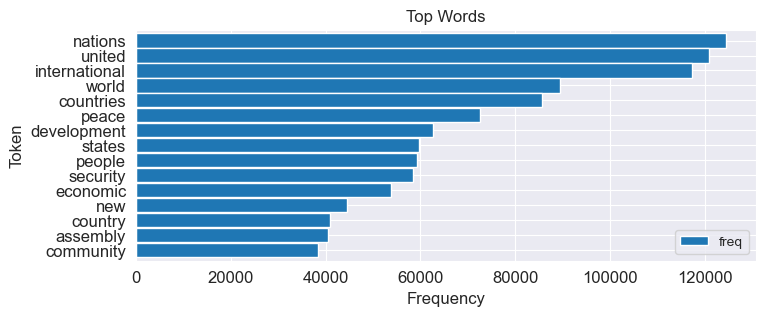

In [43]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(8,3))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Blueprint: Creating Word Clouds


In [1]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.6 MB/s eta 0:00:00a 0:00:01


(-0.5, 399.5, 199.5, -0.5)

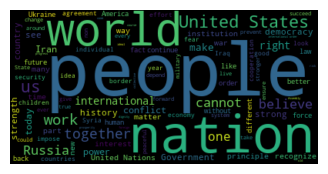

In [44]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]

plt.figure(figsize=(4, 2)) ###
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [45]:
from wordcloud import WordCloud ###
from collections import Counter ###

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):

    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

  0%|          | 0/193 [00:00<?, ?it/s]

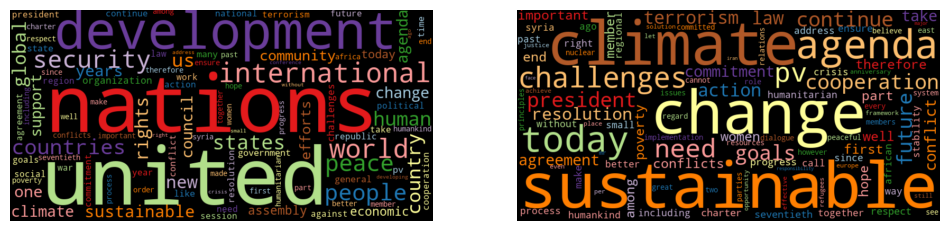

In [46]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###

## Question 4: 

Counting seems to be a significant issue for feminist scholars. On the one hand, being counted is a political act (as we remember from the readings in Week 4 as well as in Mandell's chapter that we read for this week). How do the kinds of counting that we can do with text analysis create challenges for the feminist scholar according to Laura Mandell? How do you see what she describes at play in these blueprint text processes? 

Mandell particularly concerned with how large datasets such as this corpus of UN speeches can reinforce existing stereotypes and biases. The vast majority of speeches given at the UN are by men and that should shape the lens through which we interpret the data.

## Blueprint: Ranking with TF-IDF


In [47]:
def compute_idf(df, column='tokens', preprocess=None, min_df=2):

    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))

    # count tokens
    counter = Counter()
    df[column].progress_map(update)

    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df

In [48]:
idf_df = compute_idf(df)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [49]:
# Not in book: sample of IDF values
# high IDF means rare (interesting) term
idf_df.sample(5)

,df,idf
token,,
opportunistic,26,5.77
degenerates,6,7.23
coordination,951,2.17
bertrand,17,6.19
speculating,7,7.08


In [50]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

In [51]:
# not in book: for more data: joining is faster
freq_df = freq_df.join(idf_df)
freq_df['tfidf'] = freq_df['freq'] * freq_df['idf']

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

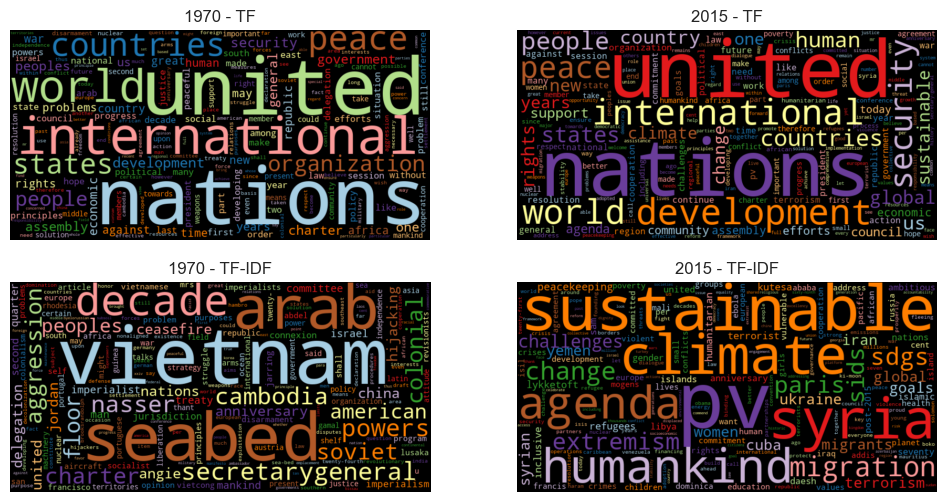

In [52]:
freq_1970 = count_words(df[df['year'] == 1970])
freq_2015 = count_words(df[df['year'] == 2015])

freq_1970['tfidf'] = freq_1970['freq'] * idf_df['idf']
freq_2015['tfidf'] = freq_2015['freq'] * idf_df['idf']

plt.figure(figsize=(12,6)) ###
#wordcloud(freq_df['freq'], title='All years', subplot=(1,3,1))
plt.subplot(2,2,1)###
wordcloud(freq_1970['freq'], title='1970 - TF', 
          stopwords=['twenty-fifth', 'twenty-five'])
plt.subplot(2,2,2)###
wordcloud(freq_2015['freq'], title='2015 - TF', 
          stopwords=['seventieth'])
plt.subplot(2,2,3)###
wordcloud(freq_1970['tfidf'], title='1970 - TF-IDF', 
          stopwords=['twenty-fifth', 'twenty-five', 'twenty', 'fifth'])
plt.subplot(2,2,4)###
wordcloud(freq_2015['tfidf'], title='2015 - TF-IDF', 
          stopwords=['seventieth'])

## Question 5: 

What is the attraction to scholars like Ted Underwood in the ability to make use of classification analyses like TF-IDF? What kinds of questions could be asked of a text corpora using an unsupervised classification study like the one above? 

TF-IDF studies can be particularly useful in uncovering the implicit assumptions and biases of a corpus of text, as they can identify the words and phrases that are most strongly associated with particular groups or perspectives. So in the UN speech corpus, fairly inconsequential or generalizable terms such as 'international', 'nations', 'world', 'peace' are emphasized across both 1970 and 2015. But in the TF-IDF study real issues become visible 'Vietnam', 'seabed', 'nasser', 'cambodia' in 1970 and in 2015 'sustainable climate', 'syria', and 'migration' become accentuated. So in this case, the true topical issues of the year are revealed.

# Blueprint: Finding a Keyword in Context (KWIC)


**Note:** textacy's API had major changes from version 0.10.1 (as used in the book) to 0.11.  
Here, `textacy.text_utils.KWIC` became `textacy.extract.kwic.keyword_in_context` (see [textacy documentation](https://textacy.readthedocs.io/en/latest/api_reference/extract.html#module-textacy.extract.kwic)).




In [54]:
!pip install textacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.4/208.4 kB 2.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.5 MB/s eta 0:00:00a 0:00:01


In [55]:
import textacy

if textacy.__version__ < '0.11': # as in printed book
    from textacy.text_utils import KWIC
    
else: # for textacy 0.11.x
    from textacy.extract.kwic import keyword_in_context

    def KWIC(*args, **kwargs):
        # call keyword_in_context with all params except 'print_only'
        return keyword_in_context(*args, 
                           **{kw: arg for kw, arg in kwargs.items() 
                            if kw != 'print_only'})

In [56]:
def kwic(doc_series, keyword, window=35, print_samples=5):

    def add_kwic(text):
        kwic_list.extend(KWIC(text, keyword, ignore_case=True, 
                              window_width=window, print_only=False))

    kwic_list = []
    doc_series.progress_map(add_kwic)

    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0])+'  '+ \
                  sample[1]+'  '+\
                  re.sub(r'[\n\t]', ' ', sample[2]))

In [57]:
random.seed(22) ###
kwic(df[df['year'] == 2015]['text'], 'sdgs', print_samples=5)

  0%|          | 0/193 [00:00<?, ?it/s]

5 random samples out of 73 contexts for 'sdgs':
 of our planet and its people. The   SDGs   are a tangible manifestation of th
nd, we are expected to achieve the   SDGs   and to demonstrate dramatic develo
ead by example in implementing the   SDGs   in Bangladesh. Attaching due impor
the Sustainable Development Goals (  SDGs  ). We applaud all the Chairs of the
new Sustainable Development Goals (  SDGs  ) aspire to that same vision. The A


# Blueprint: Analyzing N-Grams


In [58]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens, 2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


In [59]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
            if len([t for t in ngram if t in stopwords])==0]

print("Bigrams:", "|".join(ngrams(tokens, 2, stopwords=stopwords)))
print("Trigrams:", "|".join(ngrams(tokens, 3, stopwords=stopwords)))

Bigrams: visible manifestation|global climate|climate change
Trigrams: global climate change


In [60]:
df['bigrams'] = df['text'].progress_apply(prepare, pipeline=[str.lower, tokenize]) \
                          .progress_apply(ngrams, n=2, stopwords=stopwords)

count_words(df, 'bigrams').head(5)

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

,freq
token,
united nations,103236
international community,27786
general assembly,27096
security council,20961
human rights,19856


In [61]:
idf_df = compute_idf(df) ### re-initialize to be safe
# concatenate existing IDF data frame with bigram IDFs
idf_df = pd.concat([idf_df, compute_idf(df, 'bigrams', min_df=10)])

freq_df = count_words(df[df['year'] == 2015], 'bigrams')
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/7507 [00:00<?, ?it/s]

  0%|          | 0/193 [00:00<?, ?it/s]

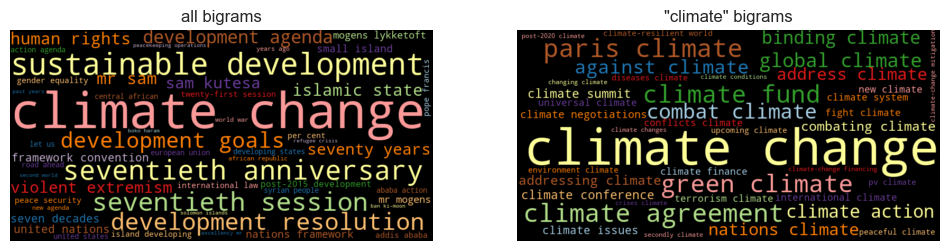

In [62]:
plt.figure(figsize=(12,6)) ###
plt.subplot(1,2,1) ###
wordcloud(freq_df['tfidf'], title='all bigrams', max_words=50)

plt.subplot(1,2,2) ###
# plt.tight_layout() ###
where = freq_df.index.str.contains('climate')
wordcloud(freq_df[where]['freq'], title='"climate" bigrams', max_words=50)

# Blueprint: Comparing Frequencies across Time-Intervals and Categories


## Creating Frequency Timelines


In [63]:
def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [64]:
keywords = ['nuclear', 'terrorism', 'climate', 'freedom']
tokens = ['nuclear', 'climate', 'climate', 'freedom', 'climate', 'freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [65]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].progress_apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

In [66]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

  0%|          | 0/7507 [00:00<?, ?it/s]

In [67]:
pd.options.display.max_rows = 4

In [68]:
pd.options.display.max_rows = 60

<AxesSubplot:xlabel='year'>

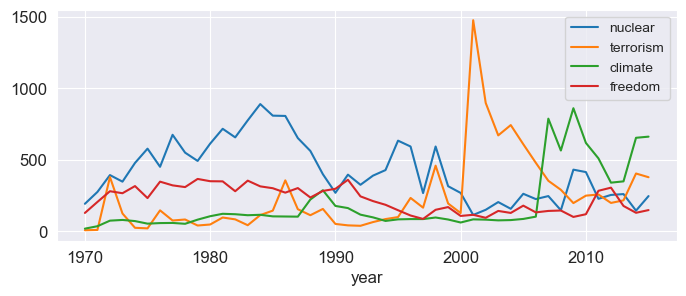

In [69]:
freq_df.plot(kind='line', figsize=(8, 3))

In [70]:
random.seed(23) ###
# analyzing mentions of 'climate' before 1980
kwic(df.query('year < 1980')['text'], 'climate', window=35, print_samples=5)

  0%|          | 0/1245 [00:00<?, ?it/s]

5 random samples out of 581 contexts for 'climate':
ation with a view to replacing the   climate   of fear, mistrust and hatred by to
ntributing to the maintenance of a   climate   of peace, harmony and understandin
ges in the international political   climate  . There is increasing awareness of 
rian-Israeli front, have created a   climate   which favors the continuation of n
 that, far from noting a promising   climate   in the most critical areas of inte


## Creating Frequency Heat Maps


  0%|          | 0/7507 [00:00<?, ?it/s]

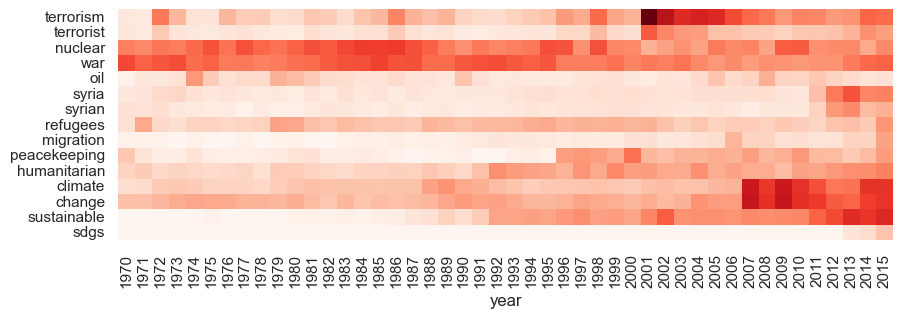

In [71]:
keywords = ['terrorism', 'terrorist', 'nuclear', 'war', 'oil',
            'syria', 'syrian', 'refugees', 'migration', 'peacekeeping', 
            'humanitarian', 'climate', 'change', 'sustainable', 'sdgs']  

freq_df = count_keywords_by(df, by='year', keywords=keywords)

# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

plt.figure(figsize=(10, 3)) ###
sns.set(font_scale=1) ###
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1) ###

# Closing Remarks


## Question 6: 

What is the value of exploratory analysis in computational text analysis? How can it be helpful? In what ways is it insufficient? 

Exploratory analysis can allow researchers to identify patterns and trends which can then lead to the generation of hypotheses for further investigation. Also there may be errors or inconsistencies in the data that can be identified with the initial exploration. 

There are limitations as 'trends' do not establish causality or previde definitive answers to research question. As well exploratory analysis can be prone to bias if the context of the source of the data is not considered. A context could emphasize a particular pattern and if unaccounted for the exploratory analysis may affirm an established set of biases.